In [1]:
import os 
import sys
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

repo_root = os.path.abspath(os.path.join(os.getcwd(), '..', ))
sys.path.append(repo_root)

from src import *

0.423
0.423


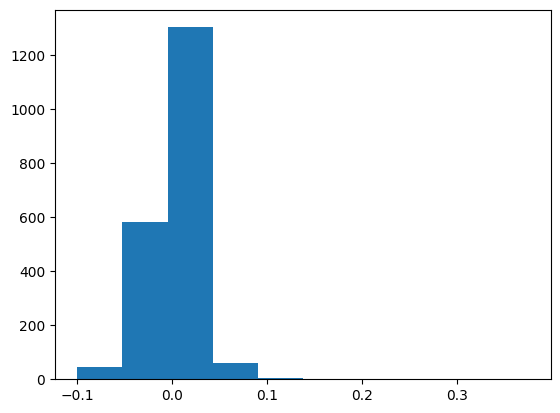

In [47]:
data, pi_values = generate_leadership_model_instance_weighted(100,10000,4,4)
training_set, testing_set = train_test_split(data, train_size=.8, random_state=None)

weighted_train = convert_games_to_dict(training_set)
weighted_test = convert_games_to_dict(testing_set)

hol_predictions = get_predictions('higher_order_leadership', weighted_train, pi_values)
stdl_predictions = get_predictions('newman_leadership', weighted_train, pi_values)

minus = np.array(compute_leadership_likelihood(hol_predictions, testing_set)) - np.array(compute_leadership_likelihood(stdl_predictions, testing_set)) 
prop = sum(np.array(compute_leadership_likelihood(hol_predictions, testing_set)) > np.array(compute_leadership_likelihood(stdl_predictions, testing_set)))/ len(testing_set)
plt.hist(minus)

print(prop)
print(len(minus[minus > 0])/len(testing_set))

# plt.hist(np.array(list(hol_predictions.values()))-np.array(list(stdl_predictions.values())))
# for key in hol_predictions:
#     print(hol_predictions[key] - stdl_predictions[key])



